In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import scipy.stats as sstats
import scipy.linalg as slinalg
import math
import tqdm

from time import time

import seaborn as sns
from sklearn import datasets

In [2]:
def gray(color):
    c = int(np.mean(color))
    return [c,c,c]

In [3]:
def to_grayscale(img):
    original_image = plt.imread(img)
    image = np.copy(original_image)
    N1 = image.shape[0]
    M1 = image.shape[1]
    image = image.reshape(N1 * M1,3)
    image = np.array([[gray(image[i*M1+j]) for j in range(M1)] for i in range(N1)])
    f,axs = plt.subplots(1,2)
    axs[0].imshow(original_image)
    axs[1].imshow(image)
    axs[0].axis('off')
    axs[1].axis('off')

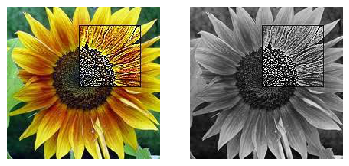

In [4]:
to_grayscale("img1.jpg")

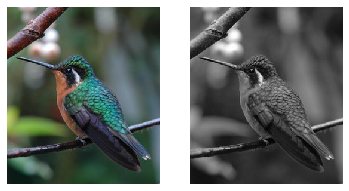

In [5]:
to_grayscale("img2.jpg")

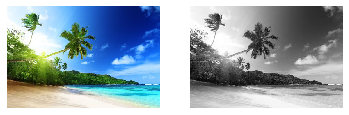

In [6]:
to_grayscale("img4.jpg")

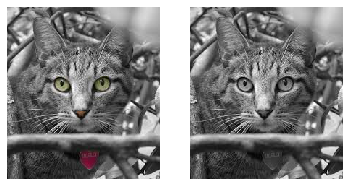

In [7]:
to_grayscale("img5.jpg")

In [8]:
def is_gray(color,eps):
    return max(color) - min(color) <= 2*eps

In [9]:
def colorize(color1, color2):
    c = np.array(color1) + np.array(color2)
    c = c * (max(color1) / np.max(c))
    return list(c.astype(int))

In [23]:
def colorize_image(img,eps=10,n=10):
    original_image = plt.imread(img)
    image = np.copy(original_image)
    N1 = image.shape[0]
    M1 = image.shape[1]
    
    vivids = []
    all_points = []
    for i in range(N1):
        for j in range(M1):
            if not is_gray(original_image[i,j,:],50):
                vivids.append([i,j])
            all_points.append([i,j])
    if not vivids:
        vivids.append([0,0])
    vivids = np.array(vivids)
    all_points = np.array(all_points)
            
    nearest = np.argmin(-2 * np.dot(all_points, vivids.T) + np.sum(vivids**2,axis=1),axis=1)
    nearest_rgb = np.array([original_image[vivids[i][0],vivids[i][1],:] for i in nearest])
            
    image = np.array([[colorize(original_image[i,j,:],nearest_rgb[i*M1+j,:]) if is_gray(original_image[i,j,:],eps) else original_image[i,j,:] for j in range(M1)] for i in range(N1)])
    f,axs = plt.subplots(1,2)
    axs[0].imshow(original_image)
    axs[1].imshow(image)
    axs[0].axis('off')
    axs[1].axis('off')

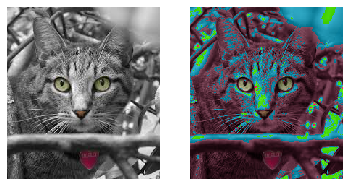

In [27]:
colorize_image("img5.jpg")

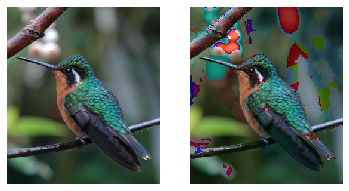

In [28]:
colorize_image("img2.jpg")

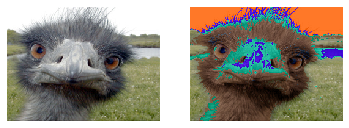

In [29]:
colorize_image("img3.jpg")